#### 【 이미지 합성 】

- 픽셀(Pixel)단위 덧셈 연산으로 이미지 픽셀 합치기
- 두 이미지 합성하기 위해 각각의 이미지에 가중치 주고 합성 진행
    * cv2.addWeighted() : 합성 이미지에 가중치 설정

[1] 모듈 로딩 및 데이터 준비 <hr>

In [1]:
## [1-1] 모듈 로딩
import cv2
import matplotlib.pyplot as plt

In [9]:
## [1-2] 데이터 준비
img1 = cv2.imread('../Data/Image/wing_wall.jpg')
img2 = cv2.imread('../Data/Image/yate.jpg')

[2] 데이터 로딩 <hr>

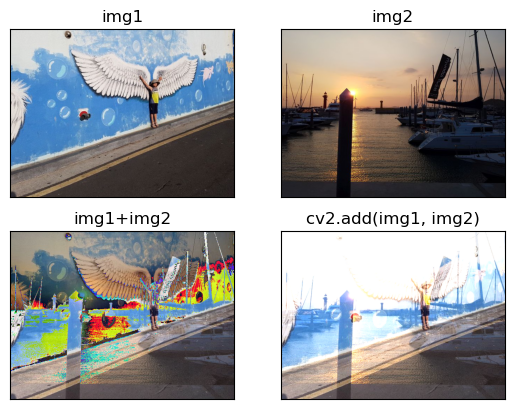

In [12]:
img3 = img1 + img2
img4 = cv2.add(img1, img2)

imgs = {'img1':img1, 'img2':img2,
        'img1+img2':img3, 'cv2.add(img1, img2)':img4}

for i, (k, v) in enumerate(imgs.items()):
    plt.subplot(2, 2, i+1)
    plt.imshow(v[:,:,::-1])
    plt.title(k)
    plt.xticks([])
    plt.yticks([])

plt.show()

In [ ]:
## =============================================
## [3-2] 자연스러운 합성
## =============================================
## 이미지 데이터 마다 밝기 조절에 대한 가중치
## alpha - 1번 이미지 밝기 가중치
## beta  - 2번 이미지 밝기 가중치
## gamma - 결과에 동일 적용되는 값으로 밝기 조절
## -> alpha + beta = 1.0
result2=cv2.addWeighted(dataNP1, 0.5, dataNP2, 0.5, 0.)

print(f'result2 => {result2.shape}')

In [ ]:
### 시각화
fig, axes = plt.subplots(2, 4, figsize=(20,5))
imgNP     = [dataNP1, dataNP2, result1, result2]
titles    = ['AIRPLAIN', ]



[4] 이미지 합성 + 트랙바 <hr>

In [14]:
win_name = 'Alpha blending'
trackbar_name = 'fade'

def onChange(x):
    alpha = x/100
    dst = cv2.addWeighted(img1, 1-alpha, img2, alpha, 0)
    cv2.imshow(win_name, dst)

img1 = cv2.imread('../Data/Image/man_face.jpg')
img2 = cv2.imread('../Data/Image/lion_face.jpg')

cv2.imshow(win_name, img1)
cv2.createTrackbar(trackbar_name, win_name, 0, 100, onChange)

cv2.waitKey()
cv2.destroyAllWindows()